<a href="https://colab.research.google.com/github/turukano26/SimpleNotebooks/blob/main/mars_elevation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://planetarymaps.usgs.gov/mosaic/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif" -P "/content/drive/My Drive/mars/data"

--2022-11-28 18:28:58--  https://planetarymaps.usgs.gov/mosaic/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif
Resolving planetarymaps.usgs.gov (planetarymaps.usgs.gov)... 66.85.141.154
Connecting to planetarymaps.usgs.gov (planetarymaps.usgs.gov)|66.85.141.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2125771142 (2.0G) [image/tiff]
Saving to: ‘/content/drive/My Drive/mars/data/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif’

Mars_MGS_MOLA_DEM_m 100%[===================>]   1.98G  21.5MB/s    in 97s     

2022-11-28 18:30:36 (20.9 MB/s) - ‘/content/drive/My Drive/mars/data/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif’ saved [2125771142/2125771142]



In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 5.8 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import rasterio
from rasterio.enums import Resampling

upscale_factor = 0.5

with rasterio.open('drive/MyDrive/mars/data/Mars_MGS_MOLA_DEM_mosaic_global_463m.tif') as dataset:

    # resample data to target shape
    mars = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

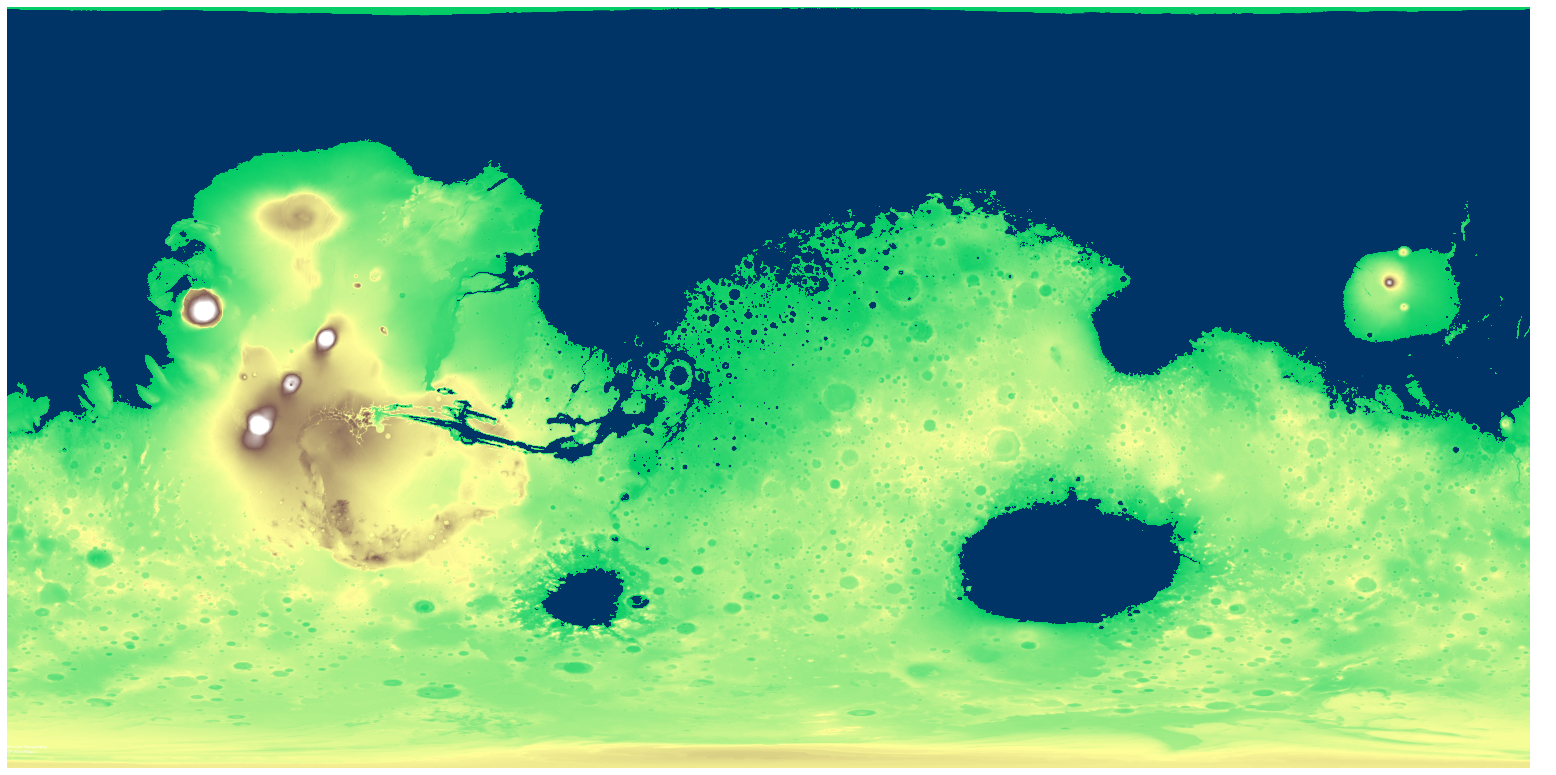

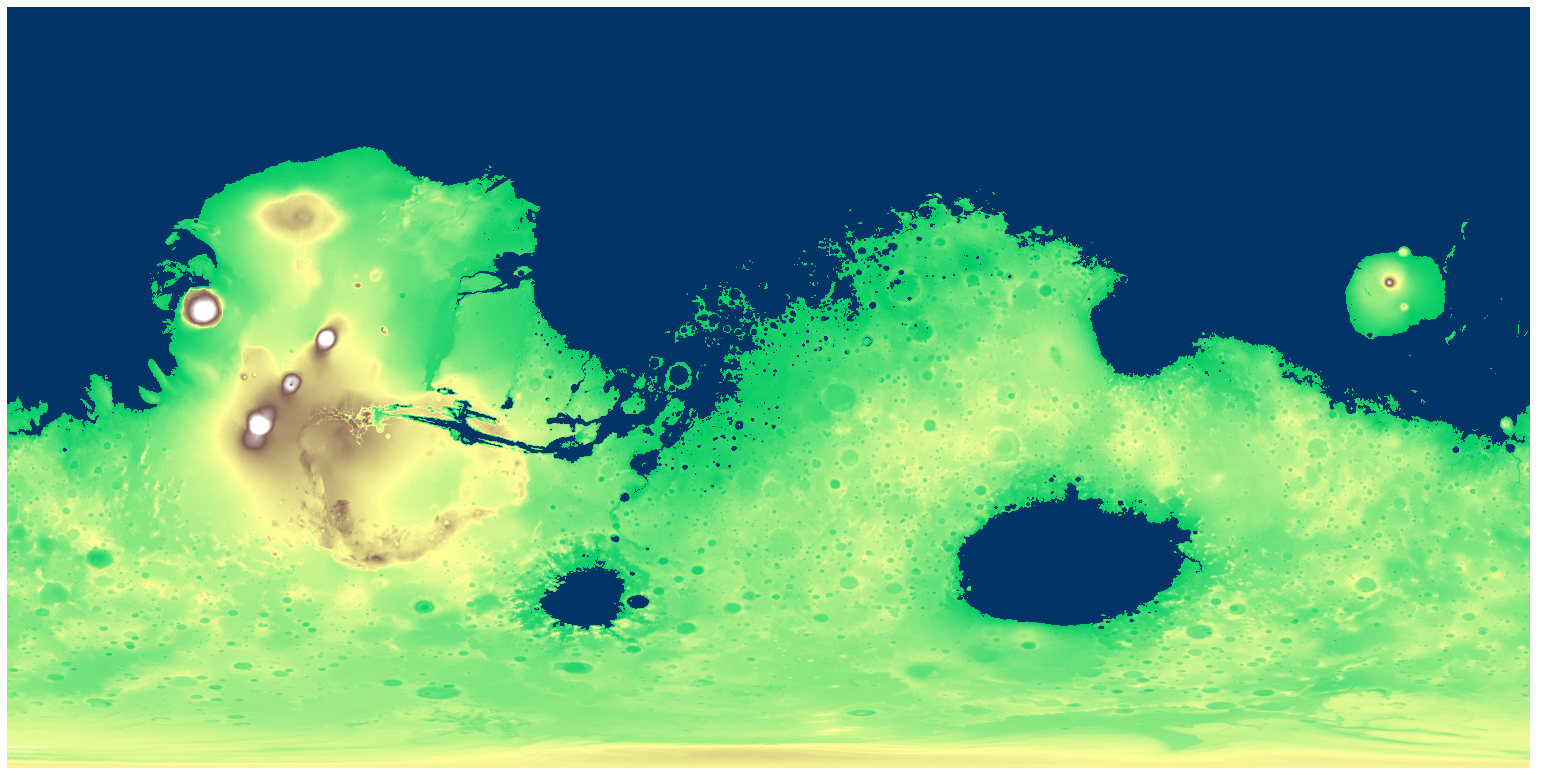

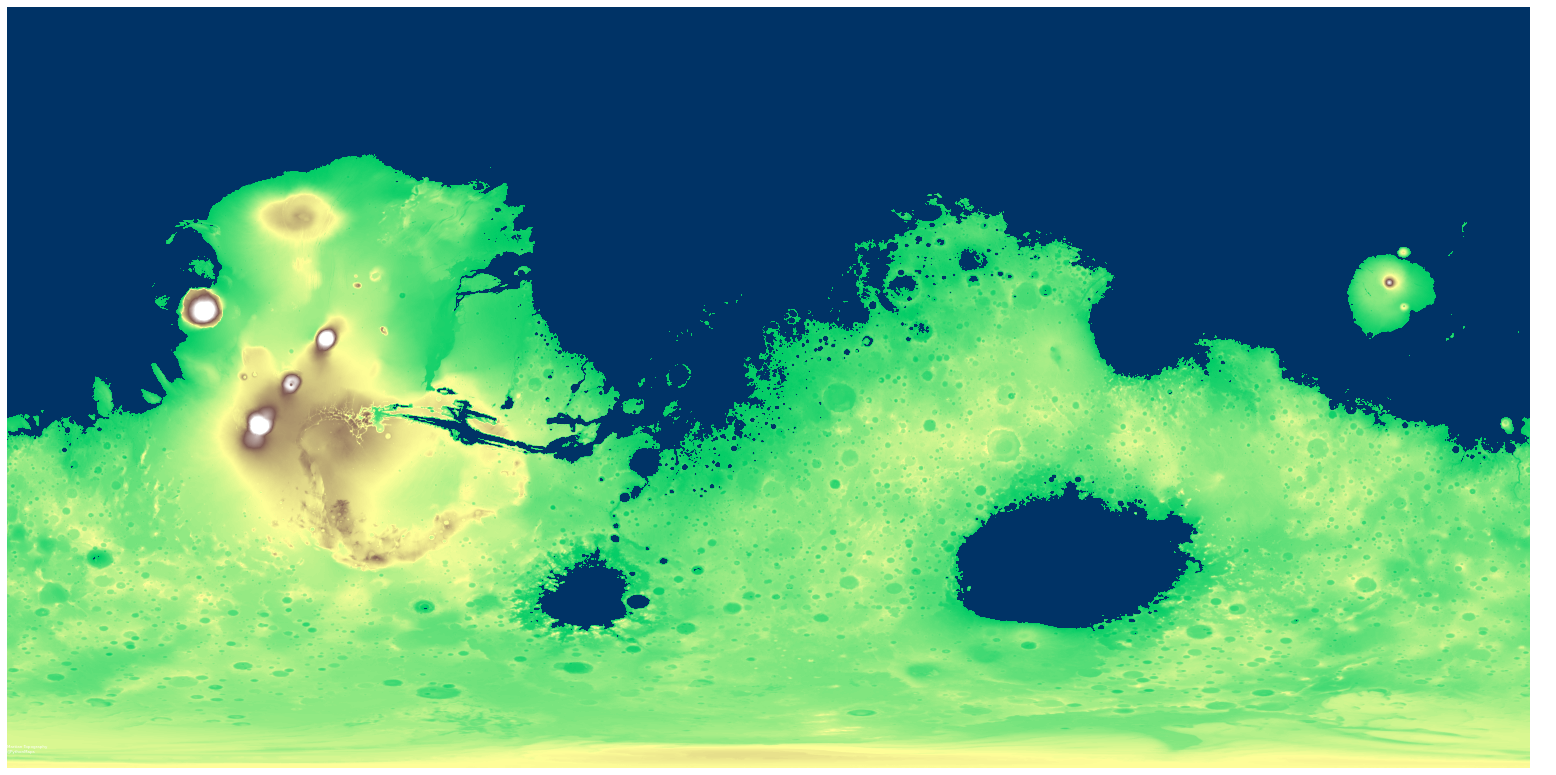

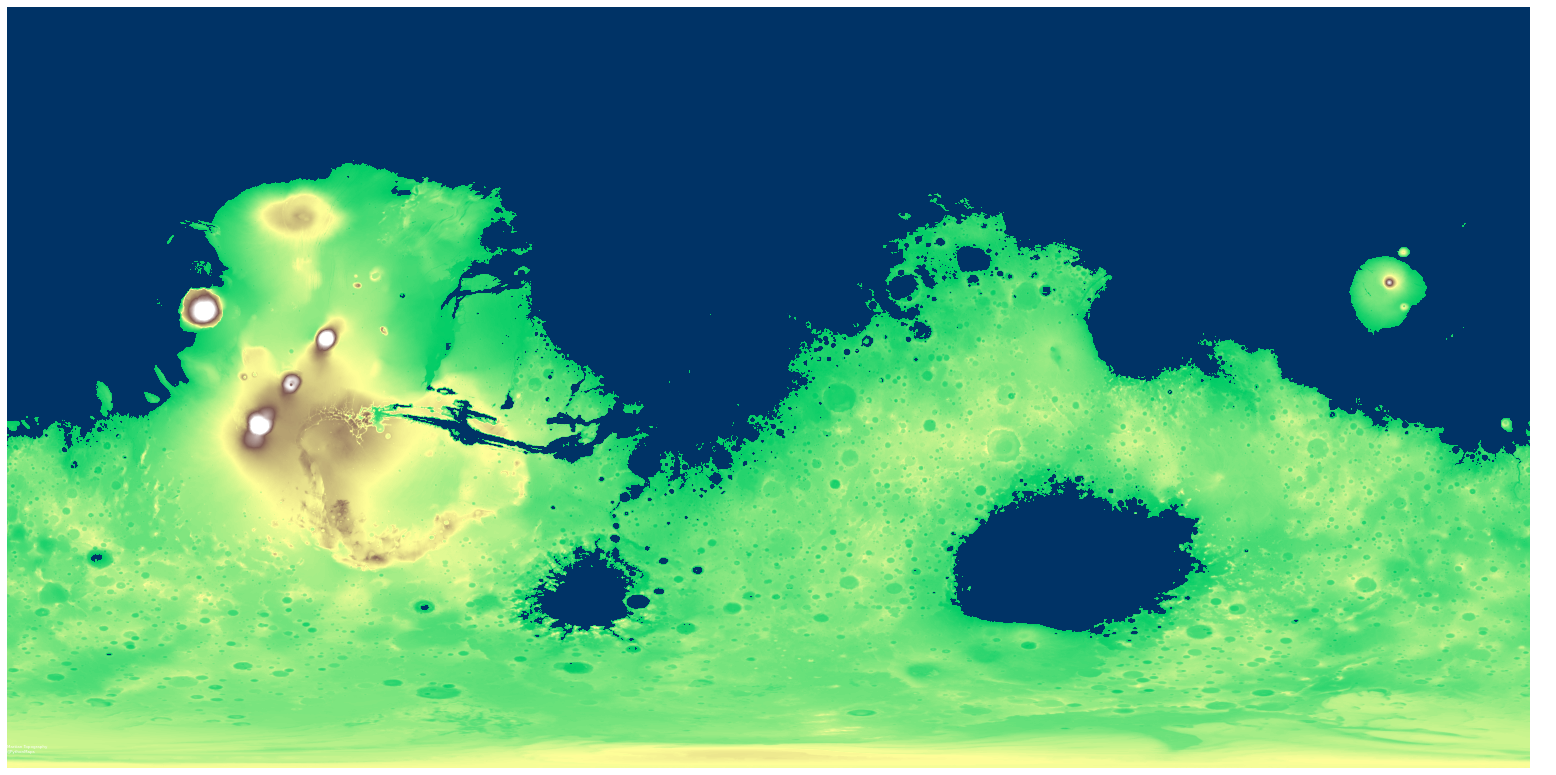

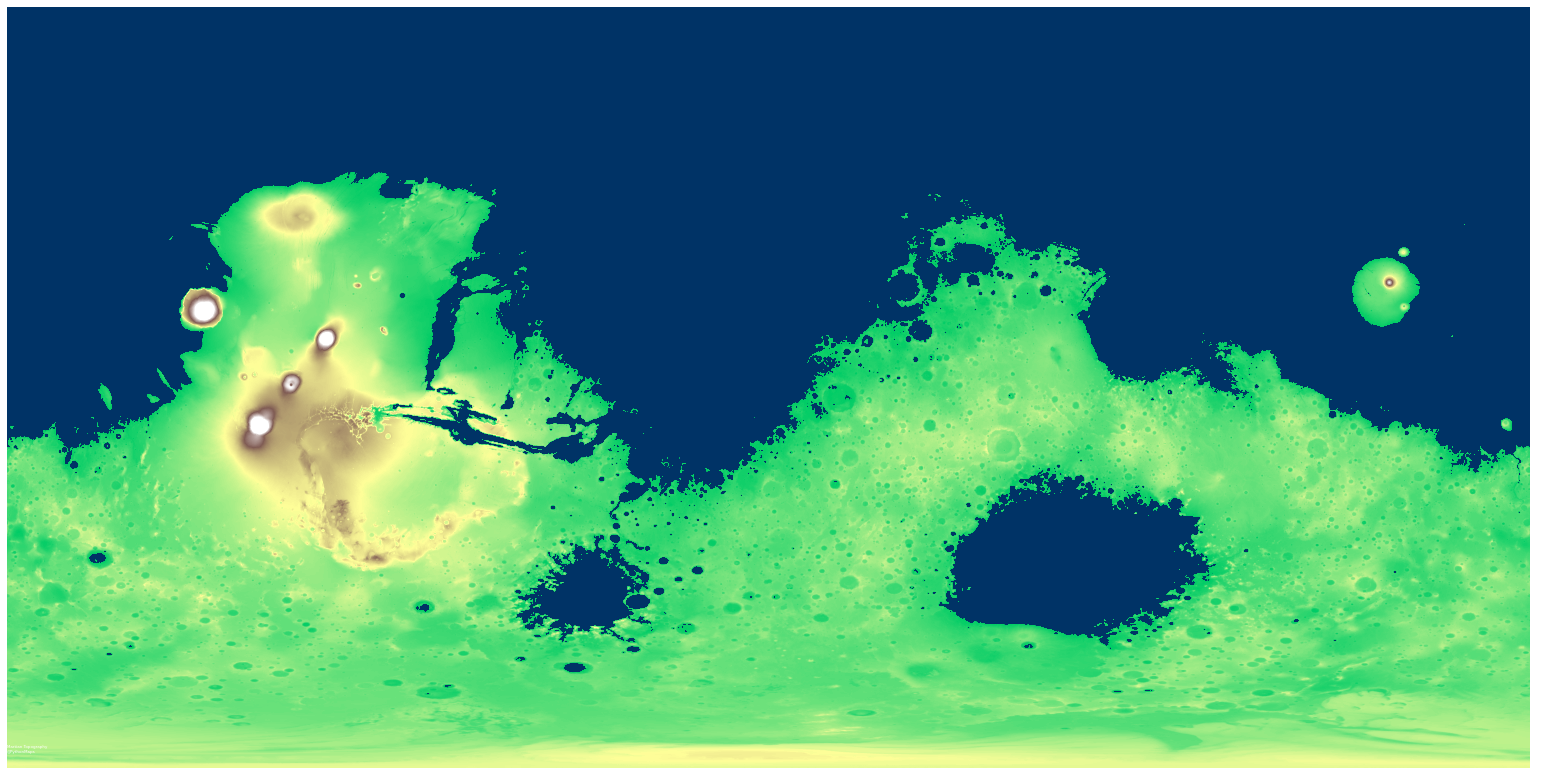

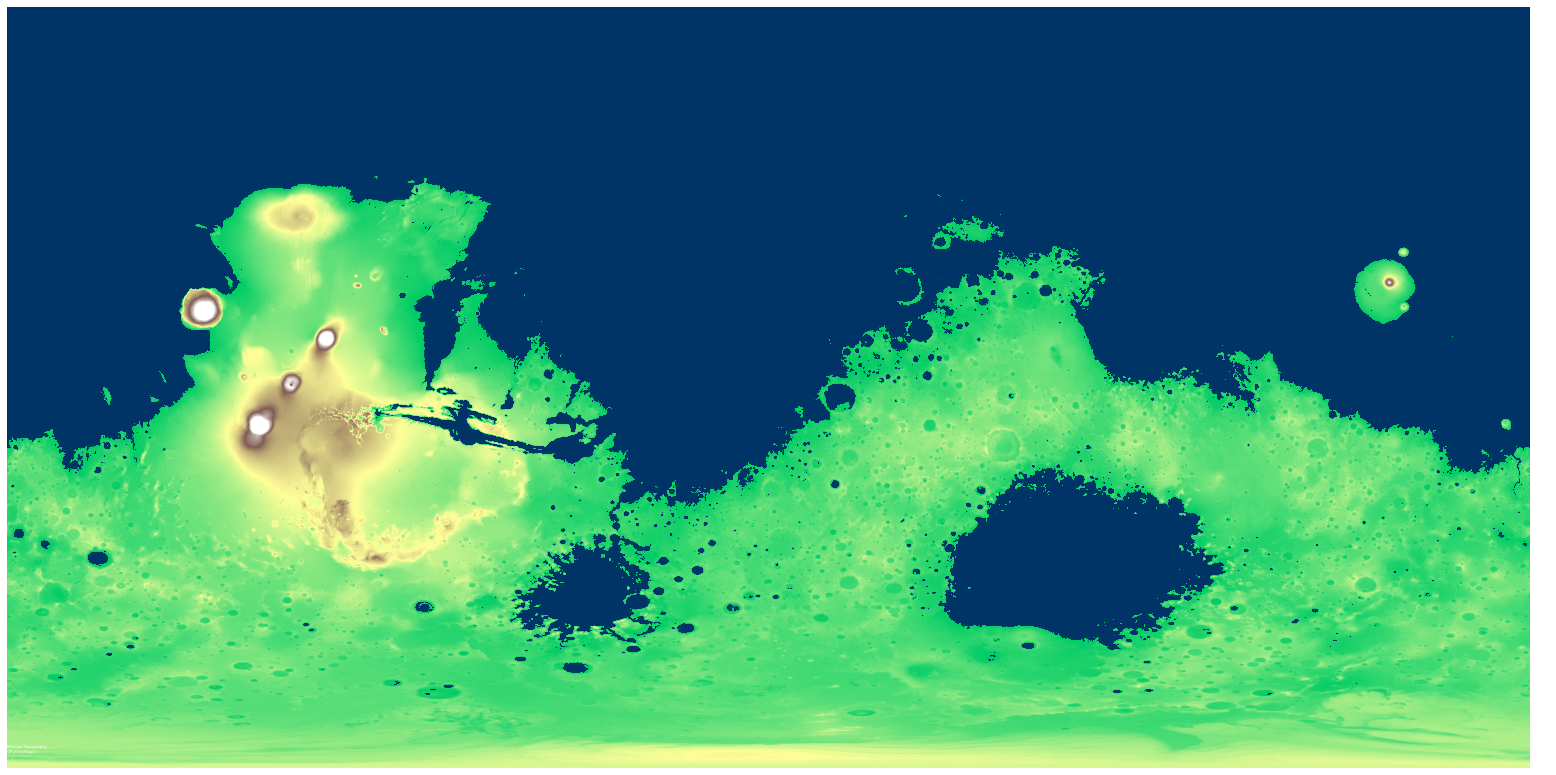

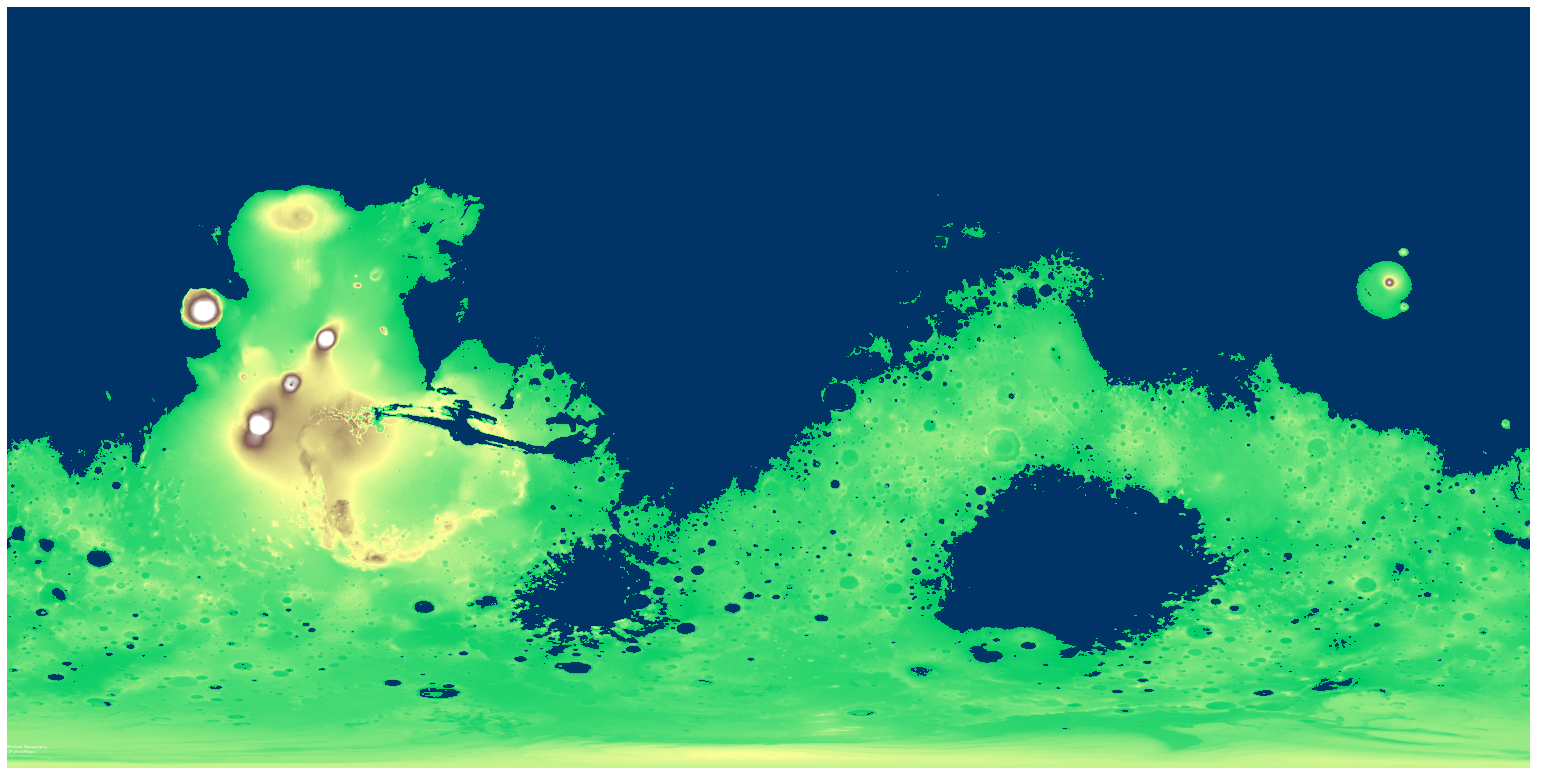

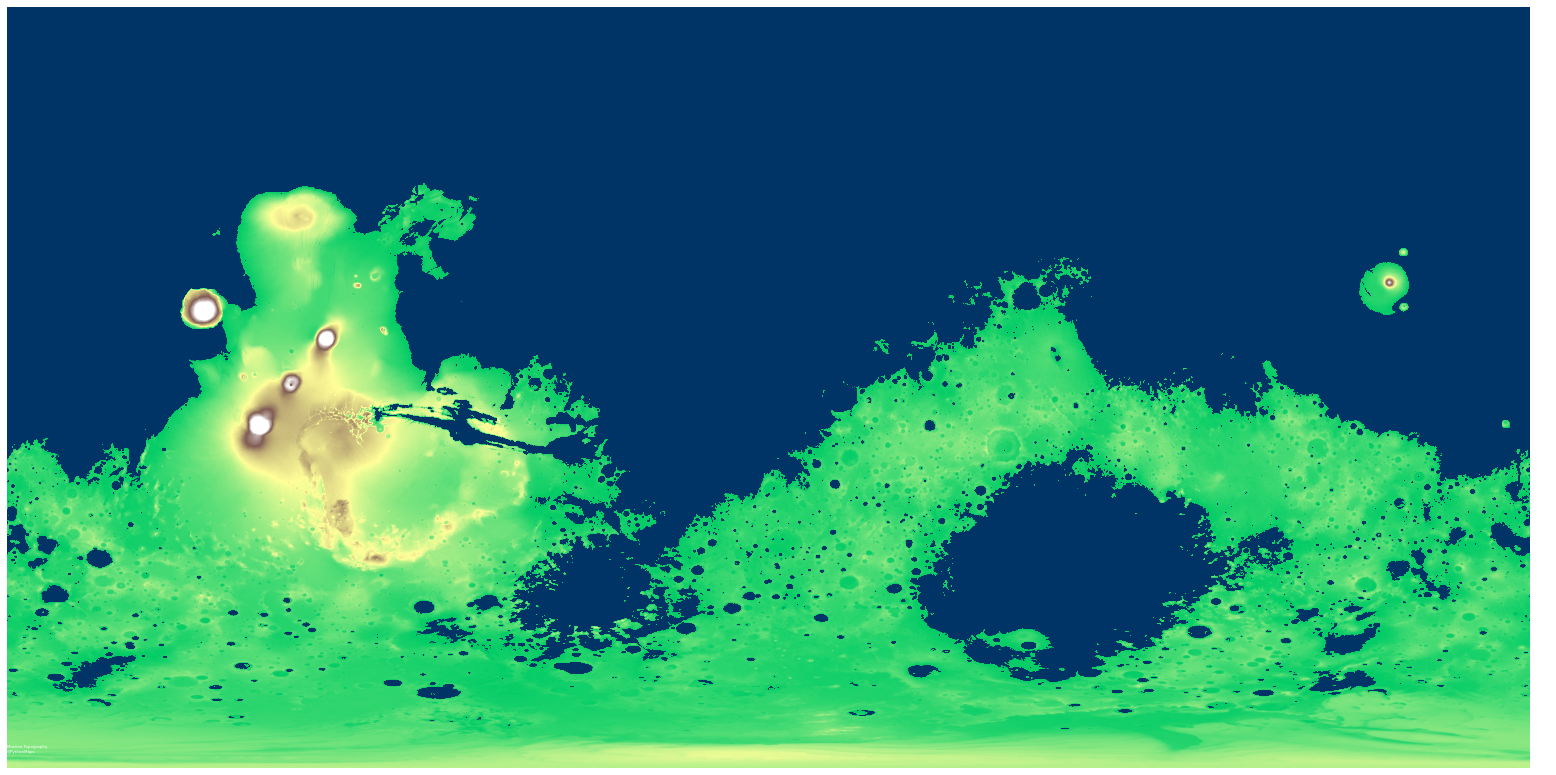

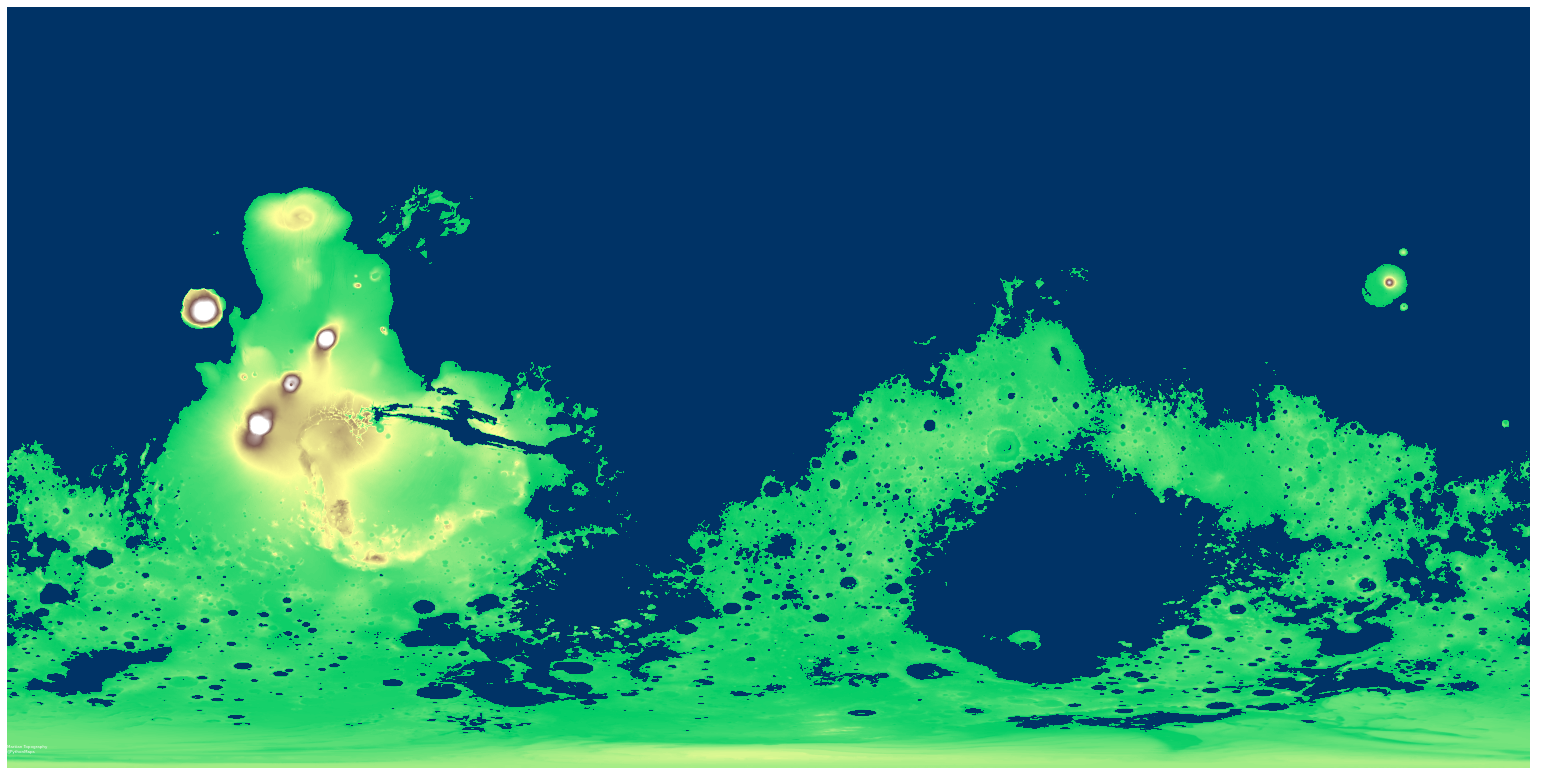

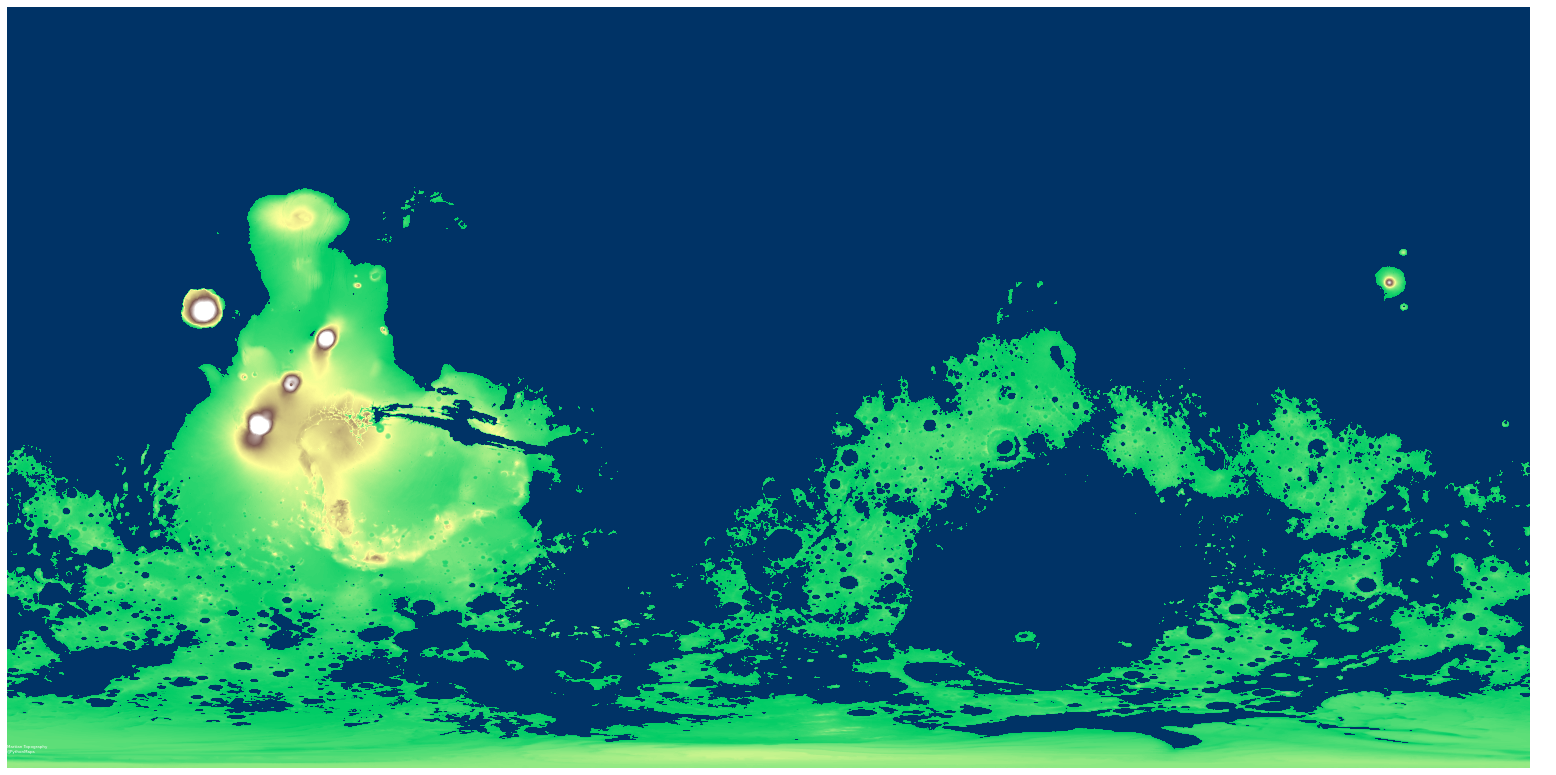

In [ ]:
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt


#colors_undersea = plt.cm.ocean(np.linspace(0.2, 0.8, 821))

def change_sea_level(new_sea_level):
    new_sea_level = new_sea_level / 10
    undersea = int(800 + new_sea_level)
    land = int(1400 - new_sea_level)

    v = np.array([[0, 0.2, 0.4, 1]])
    colors_undersea = v * np.ones((undersea, 4))
    undersea_map = LinearSegmentedColormap.from_list('undersea_map', colors_undersea, N=undersea)

    colors_land = plt.cm.terrain(np.linspace(0.25, 1, land))
    land_map = LinearSegmentedColormap.from_list('land_map', colors_land, N=land)

    colors = np.vstack((colors_undersea, colors_land))
    terrain_map = LinearSegmentedColormap.from_list('cut_terrain', colors, N=2221)

    bounds = np.arange(-8210, 14000, 10)
    norm = BoundaryNorm(bounds, terrain_map.N)
    return terrain_map, norm



def label_features_terrain(ax):
    ax.text(5000, 8400, "Olympus\n Mons")
    ax.text(7000, 10000, "Ascreaus\n Mons")
    ax.text(6200, 11500, "Pavonis\n Mons")
    ax.text(5000, 13000, "Arsia\n Mons")
    ax.text(8500, 13000, "Tharsis", rotation=45)
    ax.text(12000, 14000, "Vallies\n Marineris")
    ax.text(17000, 18000, "Argyre", color='white')
    ax.text(20000, 2000, "Vastitas Borealis", color='white')
    ax.text(17000, 8500, "Chryse\n Planitia", color='white')
    ax.text(20000, 5000, "Acidalia Planitia", color='white')
    ax.text(30000, 16500, "Hellas", color='white')
    ax.text(37000, 5000, "Utopia\n Planitia", color='white')
    ax.text(41000, 8000, "Elysium")
    ax.text(34000, 9800, "Isidis", color='white')
    ax.text(7000, 5000, "Alba Patera")
    ax.text(2000, 6500, "Amazonis\n Planitia", color='white')
    return ax



for i in range(10):
    terrain_map, norm = change_sea_level(new_sea_level = -2000 + 400*i)
    fig, ax = plt.subplots()
    fig.set_size_inches(28, 14)

    ax.imshow(mars[0], cmap=terrain_map, norm=norm)
    #ax = label_features_terrain(ax)
    ax.axis('off')
    newax = fig.add_axes([0.82, 0.13, 0.08, 0.08], anchor='NE')
    newax.axis('off')
    txt = ax.text(0.0, 0.02, "Martian Topography \n@PythonMaps",
                size=4,
                color='white',
                transform = ax.transAxes)
    plt.show()

